In [ ]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [ ]:
a = list(itertools.product(np.arange(1,7) , repeat = 2))
print(a)

In [ ]:
print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))
print(f'각 표본의 평균 : {b}')
print(f'표본들의 평균 :{c}')
print(d)


print(f'var : {np.var(b , ddof= 0)}')

In [ ]:
d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0
print(len(d))

while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        print(f'e: {e}')
        d.popleft()
        print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])
e

In [ ]:
a = list(itertools.product(np.arange(1,7) , repeat = 2))
# print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))


d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0

while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        # print(f'e: {e}')
        d.popleft()
        # print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        # print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])

B = pd.DataFrame([e ,c]).T
B.rename(columns= {0 : '표본' , 1: '|X'} , inplace = True)
B
b_len = [len(i) for i in B['표본']]
b_len
B['표본길이'] = b_len
B['P(|X = x)'] = B['표본길이'] / len(a)
B['평균'] = B['|X'] * B['P(|X = x)']
B['분산'] = (B['|X']**2) * B['P(|X = x)']


a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
col_name = a.columns.tolist()

for i in range(len(col_name[:-3])):
    a.iloc[0][i] = '-'
a.iloc[0][3] = '결과값'

a.iloc[0][5] = a.iloc[0][5] - a.iloc[0][4]**2 #분산 = |X**2  * P(X) - 평균**2

B = pd.concat([B ,a])
B

In [ ]:
a

In [ ]:
B.iloc[:-1, [1,3]]

## 2번 문제

In [ ]:
a = list(itertools.product(np.arange(1,3) , repeat = 2))
a

In [ ]:
# a_ratio = list(itertools.product(np.arange()))

In [ ]:
b = list(map(lambda x : np.mean(x) , a))
b

In [ ]:

# print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))


d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0

while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        # print(f'e: {e}')
        d.popleft()
        # print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        # print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])

B = pd.DataFrame([e ,c]).T
B.rename(columns= {0 : '표본' , 1: '|X'} , inplace = True)
b_len = [len(i) for i in B['표본']]
b_len
B['표본길이'] = b_len
B

P_X = [(0.8** i[0].count(1)  * 0.2**i[0].count(2) * len(i))  for i in B['표본']]

B['P(|X = x)'] = P_X

B['평균'] = B['|X'] * B['P(|X = x)']
B['분산'] = (B['|X']**2) * B['P(|X = x)']


a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
col_name = a.columns.tolist()

for i in range(len(col_name[:-3])):
    a.iloc[0][i] = '-'
a.iloc[0][3] = '결과값'

a.iloc[0][5] = a.iloc[0][5] - a.iloc[0][4]**2 #분산 = |X**2  * P(X) - 평균**2

B = pd.concat([B ,a])
B

In [ ]:
P_X_1 = [i for i in B['표본']]

P_X_1

for i in B['표본']:
    print(i[0])

In [ ]:
B.iloc[:-1 , [1,3]]

In [ ]:
print(np.median(np.arange(9.5 , 70 , 10)))

print(np.arange(9.5 , 70 , 10))

print(np.mean(np.arange(9.5 , 70 , 10)))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((49-50) / math.sqrt(81/25) ,2)
z_2 = round((52-50) / math.sqrt(81/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_2) & (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_2)) - stats.norm.cdf(z_1))
ax.text(1.71 , .17, f'P({z_1}<=Z<={z_2}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_2, ymin= 0 , ymax= stats.norm.pdf(z_2, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((49-50) / math.sqrt(144/25) ,2)
z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_2) & (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_2)) - stats.norm.cdf(z_1))
ax.text(1.71 , .17, f'P({z_1}<=Z<={z_2}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_2, ymin= 0 , ymax= stats.norm.pdf(z_2, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((51-50) / math.sqrt(25/16) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((51-50) / math.sqrt(25/49) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((51-50) / math.sqrt(25/64) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round(scipy.stats.norm.ppf(0.95),3)
print(z_1)
# z_1 = round((51-50) / math.sqrt(9/64) ,2)
# # z_2 = round((52-50) / math.sqrt(144/25) , 2)
#
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)))
ax.text(1.71 , .17, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
#ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
k = Symbol('k')

a = solve( (k-45) / math.sqrt(9/64) - 1.645)

print(a)



In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((3) / math.sqrt(36/16) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  0.5 - ((stats.norm.cdf((z_1)) - stats.norm.cdf(0)))


ax.text(2.61 , .05, f'P({z_1}>=Z) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(2.3, .017), xytext=(2.5 , .05)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))





ax.text(-3.71 , .055, f'P(Z<={-z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(-2.3, .017), xytext=(-2.5 , .05)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))



plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .08)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(0, .2), xytext=(2.5 , .08)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1 , .21, f'P({-z_1}<=Z<={z_1}) : {round(area*2,4)}',fontsize=15)







ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
n = Symbol('n')

a = solve(36/n - 1.5**2)

print(a)

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((200-198) / math.sqrt(36) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((200-198) / math.sqrt(36/100) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((6/5) / math.sqrt(36/100) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((0.5- 0.45) / math.sqrt(0.05**2) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)))
ax.text(1.71 , .17, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((0.5- 0.45) / math.sqrt(0.05**2 / 9 ) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((36-35) / math.sqrt(5.5**2 / 25 ) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  1- stats.norm.cdf(z_1)
ax.text(2.31 , .08, f'P(Z>={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(1.1, .08), xytext=(2.2 , .08)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((33-35) / math.sqrt(5.5**2 / 25 ) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  stats.norm.cdf(z_1)
ax.text(-5.31 , .04, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(-2.1, .04), xytext=(-3.2 , .04)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((35.5- 35) / math.sqrt(5.5**2 / 25 ) ,2)
# z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=z_2) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯
z_1 = 2
x_0 = Symbol('x_0')
x_0 = solve( (x_0 -35) / math.sqrt(5.5**2 / 25)  - scipy.stats.norm.ppf((1-0.025)))
print(x_0[0])
z_1 = round( float( (x_0[0] - 35) / math.sqrt(5.5**2 / 25)),2)
#
print(z_1)
print(type(z_1))
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  1- stats.norm.cdf(z_1)
ax.text(2.31 , .08, f'P(Z>={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(2.2, .02), xytext=(2.2 , .08)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [ ]:
x = Symbol('x')
x = solve( (x -35) / math.sqrt(5.5**2 / 25)) - scipy.stats.norm.ppf((1-0.025))

print(x[0])

In [ ]:
()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


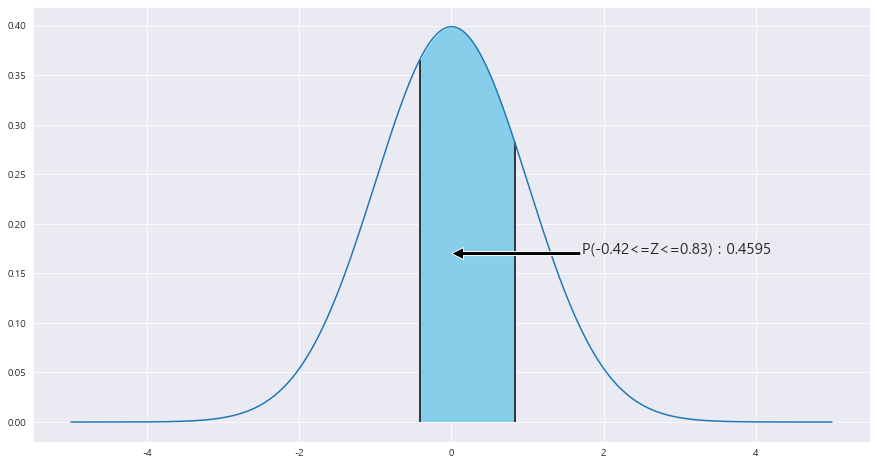

In [145]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((49-50) / math.sqrt(144/25) ,2)
z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_2) & (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_2)) - stats.norm.cdf(z_1))
ax.text(1.71 , .17, f'P({z_1}<=Z<={z_2}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_2, ymin= 0 , ymax= stats.norm.pdf(z_2, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


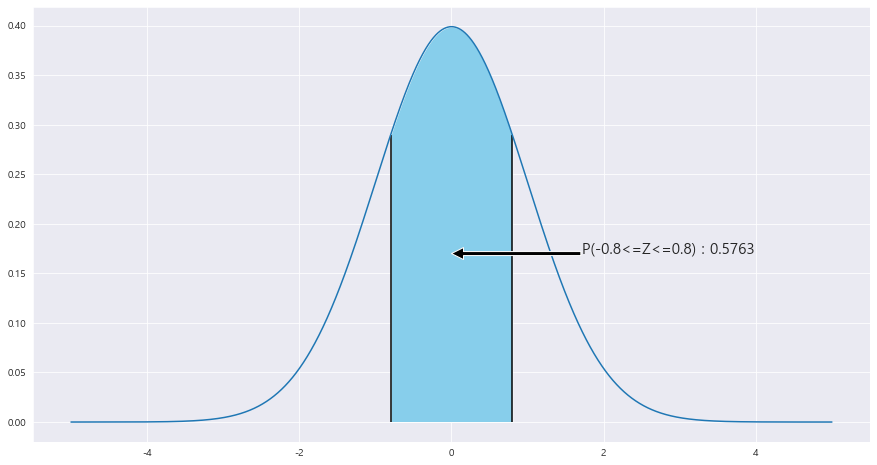

In [146]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((51-50) / math.sqrt(25/16) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


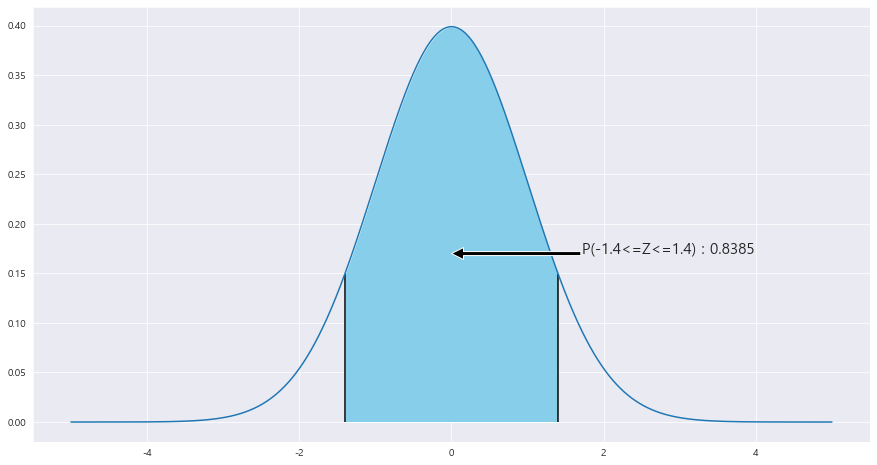

In [147]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((51-50) / math.sqrt(25/49) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


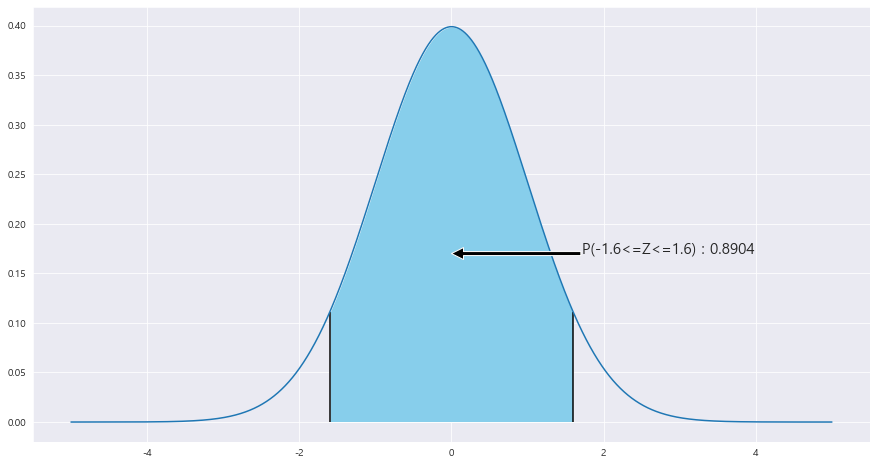

In [148]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((51-50) / math.sqrt(25/64) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.645


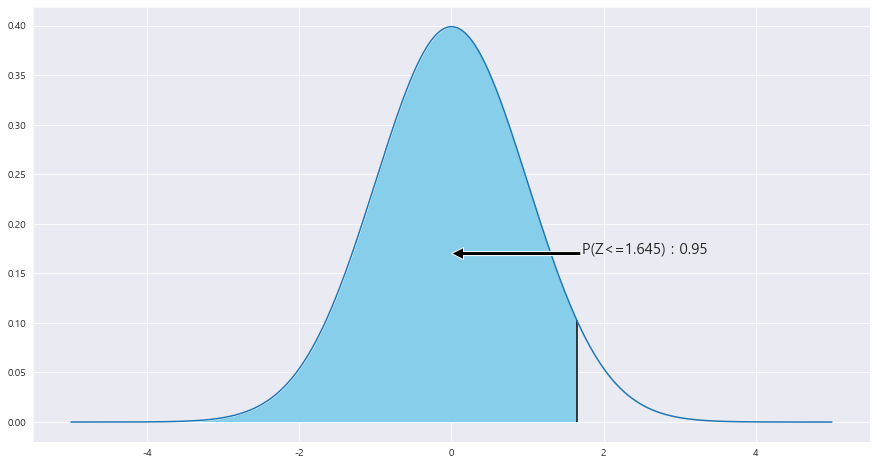

In [149]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round(scipy.stats.norm.ppf(0.95),3)
print(z_1)
# z_1 = round((51-50) / math.sqrt(9/64) ,2)
# # z_2 = round((52-50) / math.sqrt(144/25) , 2)
#
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)))
ax.text(1.71 , .17, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
#ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [150]:
k = Symbol('k')

a = solve( (k-45) / math.sqrt(9/64) - 1.645)

print(a)



[45.6168750000000]


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


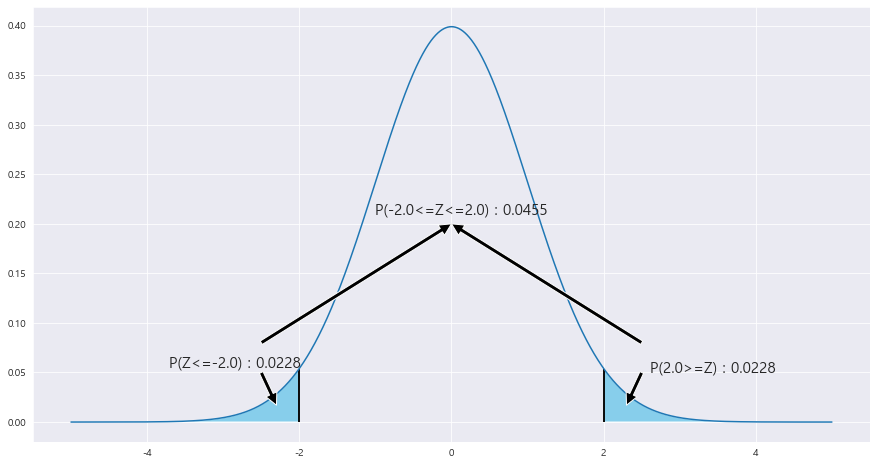

In [151]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((3) / math.sqrt(36/16) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  0.5 - ((stats.norm.cdf((z_1)) - stats.norm.cdf(0)))


ax.text(2.61 , .05, f'P({z_1}>=Z) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(2.3, .017), xytext=(2.5 , .05)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))





ax.text(-3.71 , .055, f'P(Z<={-z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(-2.3, .017), xytext=(-2.5 , .05)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))



plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .08)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(0, .2), xytext=(2.5 , .08)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1 , .21, f'P({-z_1}<=Z<={z_1}) : {round(area*2,4)}',fontsize=15)







ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [152]:
n = Symbol('n')

a = solve(36/n - 1.5**2)

print(a)

[16.0000000000000]


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


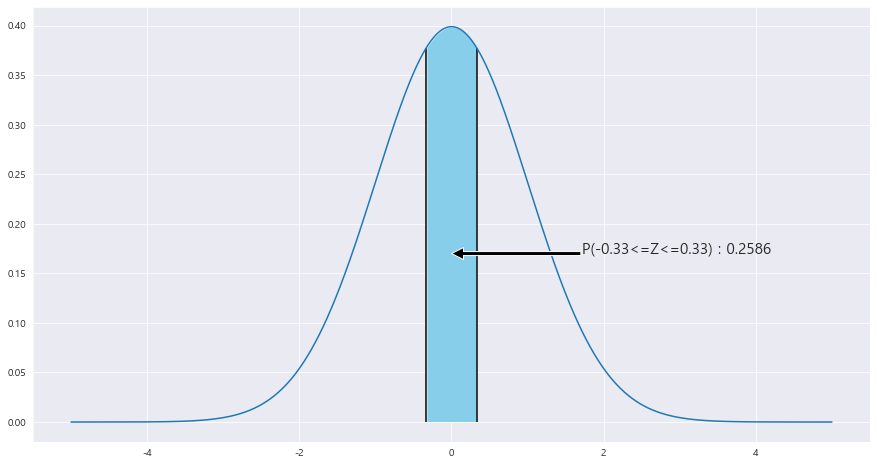

In [153]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((200-198) / math.sqrt(36) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


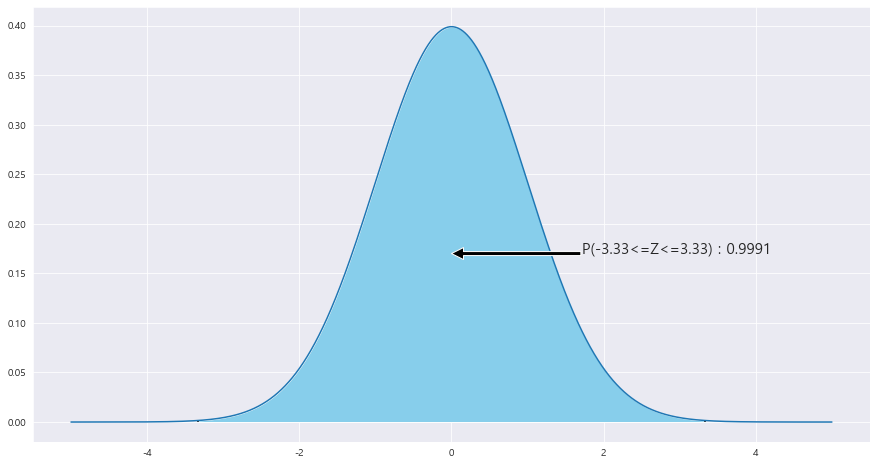

In [154]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((200-198) / math.sqrt(36/100) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


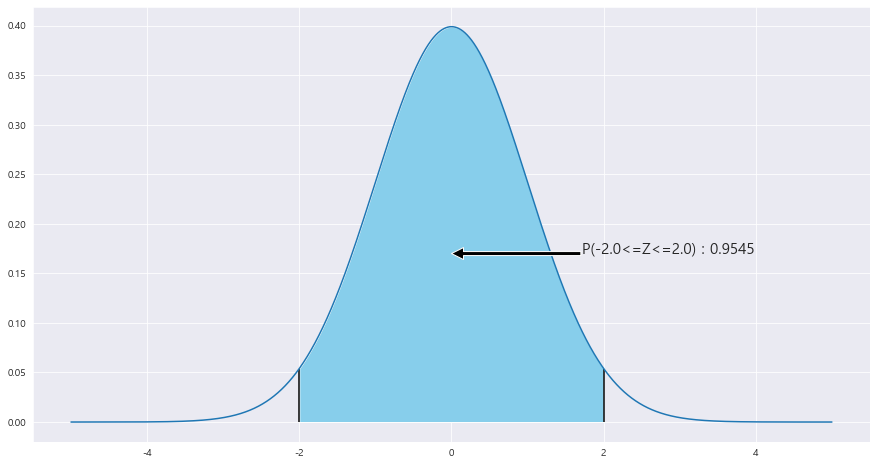

In [155]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((6/5) / math.sqrt(36/100) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


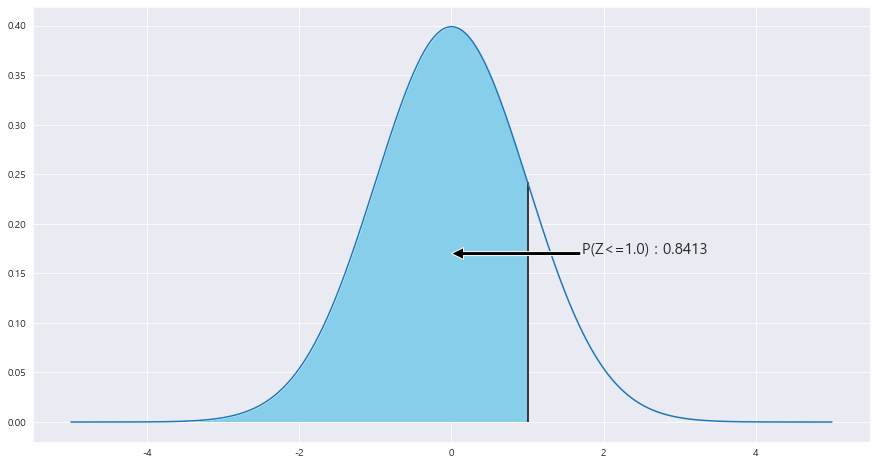

In [156]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((0.5- 0.45) / math.sqrt(0.05**2) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)))
ax.text(1.71 , .17, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


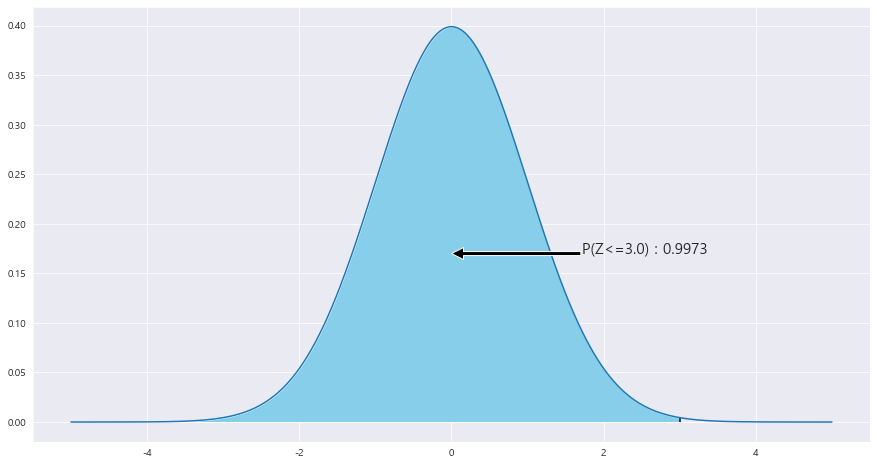

In [157]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((0.5- 0.45) / math.sqrt(0.05**2 / 9 ) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


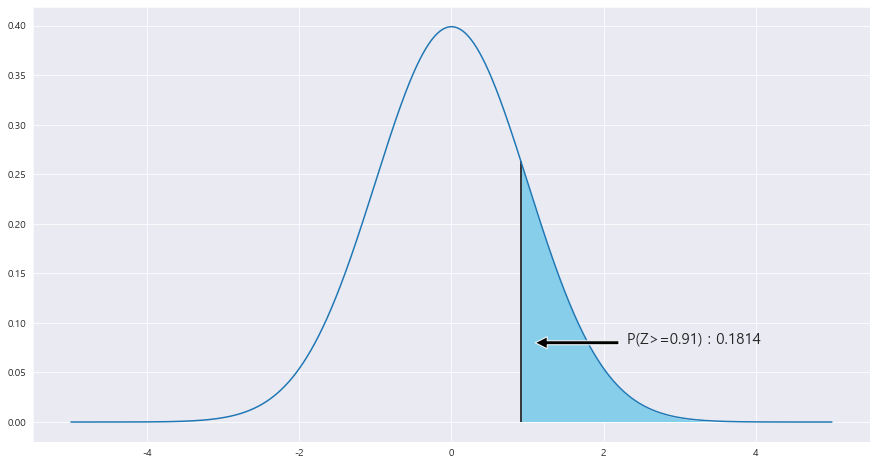

In [158]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((36-35) / math.sqrt(5.5**2 / 25 ) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  1- stats.norm.cdf(z_1)
ax.text(2.31 , .08, f'P(Z>={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(1.1, .08), xytext=(2.2 , .08)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


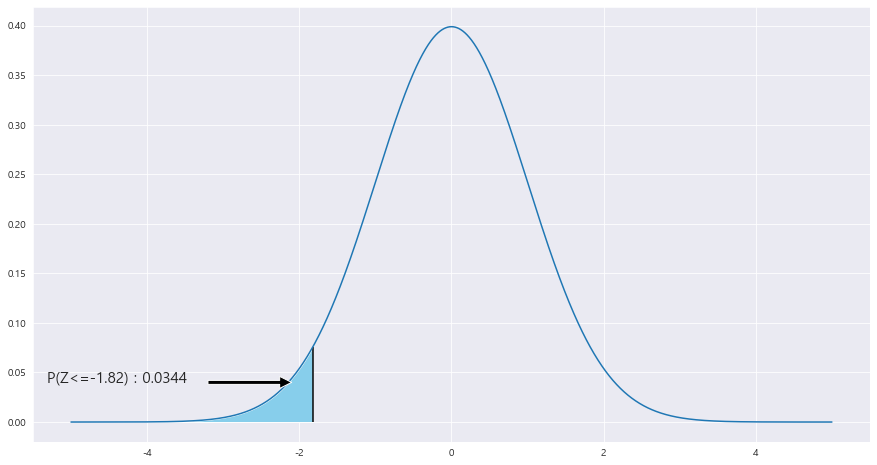

In [159]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((33-35) / math.sqrt(5.5**2 / 25 ) ,2)
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  stats.norm.cdf(z_1)
ax.text(-5.31 , .04, f'P(Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(-2.1, .04), xytext=(-3.2 , .04)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


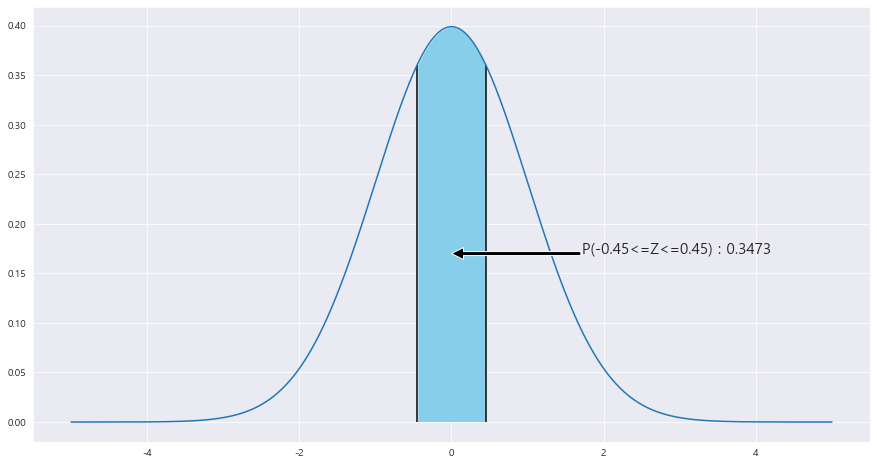

In [184]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((35.5- 35) / math.sqrt(5.5**2 / 25 ) ,2)
# z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=z_2) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


37.1559603829941
1.96
<class 'float'>


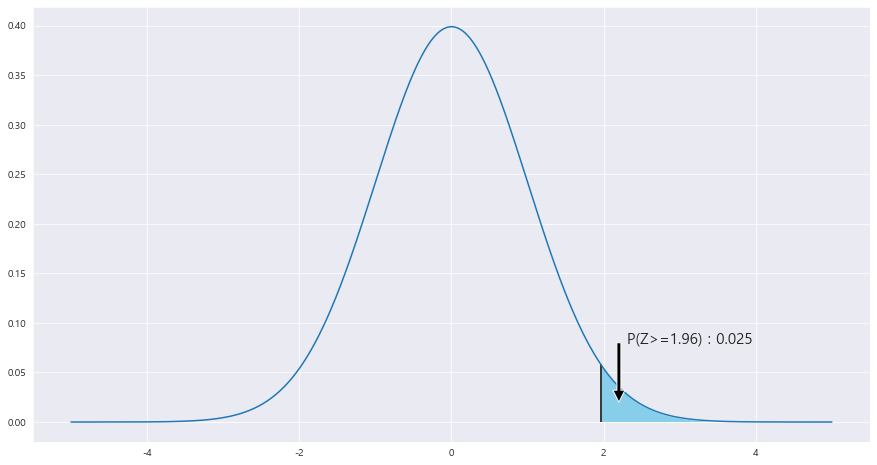

In [181]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯
z_1 = 2
x_0 = Symbol('x_0')
x_0 = solve( (x_0 -35) / math.sqrt(5.5**2 / 25)  - scipy.stats.norm.ppf((1-0.025)))
print(x_0[0])
z_1 = round( float( (x_0[0] - 35) / math.sqrt(5.5**2 / 25)),2)
#
print(z_1)
print(type(z_1))
# z_2 = round((52-50) / math.sqrt(144/25) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  1- stats.norm.cdf(z_1)
ax.text(2.31 , .08, f'P(Z>={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(2.2, .02), xytext=(2.2 , .08)  , arrowprops = dict(facecolor = 'black'))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

In [173]:
x = Symbol('x')
x = solve( (x -35) / math.sqrt(5.5**2 / 25)) - scipy.stats.norm.ppf((1-0.025))

print(x[0])

33.0400360154599


In [ ]:
()